EDA


In [ ]:
## Importing the necessary libraries 

!pip install unidecode 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.tools

from unidecode import unidecode 
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 8.5 MB/s 


In [ ]:
## Reading in the data file 

df = pd.read_csv('house_price_madrid_14_08_2022.csv')

In [ ]:
## Taking a first look at the data 

df.head()

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
0,495000,planta 1,exterior,3,118.0,True,True,Chopera,Arganzuela
1,485000,planta 2,exterior,2,82.0,True,True,Palos de Moguer,Arganzuela
2,315000,planta 2,exterior,2,72.0,False,False,Legazpi,Arganzuela
3,585000,planta 4,exterior,2,174.0,True,True,Palos de Moguer,Arganzuela
4,255000,bajo,exterior,3,75.0,False,False,Acacias,Arganzuela


In [ ]:
## How much data is there? How many columns and rows?

df.shape

(15975, 9)

In [ ]:
## Are there nulls in my data?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15975 entries, 0 to 15974
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         15975 non-null  int64  
 1   house_type    15975 non-null  object 
 2   house_type_2  15506 non-null  object 
 3   rooms         15975 non-null  int64  
 4   m2            15975 non-null  float64
 5   elevator      15975 non-null  bool   
 6   garage        15975 non-null  bool   
 7   neighborhood  15975 non-null  object 
 8   district      15975 non-null  object 
dtypes: bool(2), float64(1), int64(2), object(4)
memory usage: 905.0+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15975 entries, 0 to 15974
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         15975 non-null  int64  
 1   house_type    15975 non-null  object 
 2   house_type_2  15506 non-null  object 
 3   rooms         15975 non-null  int64  
 4   m2            15975 non-null  float64
 5   elevator      15975 non-null  bool   
 6   garage        15975 non-null  bool   
 7   neighborhood  15975 non-null  object 
 8   district      15975 non-null  object 
dtypes: bool(2), float64(1), int64(2), object(4)
memory usage: 905.0+ KB


In [ ]:
## Looking at the values of my data and where price lies

df.describe()

,price,rooms,m2
count,1.597500e+04,15975.000000,15975.000000
mean,6.242327e+05,2.847762,124.807398
std,7.709074e+05,1.360926,101.705064
min,7.250000e+02,1.000000,1.000000
25%,1.950000e+05,2.000000,66.000000
50%,3.599730e+05,3.000000,93.000000
75%,7.490000e+05,3.000000,142.000000
max,1.395000e+07,41.000000,989.000000


In [ ]:
df.describe().round()

,price,rooms,m2
count,15975.0,15975.0,15975.0
mean,624233.0,3.0,125.0
std,770907.0,1.0,102.0
min,725.0,1.0,1.0
25%,195000.0,2.0,66.0
50%,359973.0,3.0,93.0
75%,749000.0,3.0,142.0
max,13950000.0,41.0,989.0


In [ ]:
## Taking another look at how many nulls I have. Only have nulls in house type 2 saying whether it is an interior or exterior house.
## Would it be worth dropping these as it could be a key indicator of price 

df.isna().sum()

price             0
house_type        0
house_type_2    469
rooms             0
m2                0
elevator          0
garage            0
neighborhood      0
district          0
dtype: int64

In [ ]:
## Looking at the columns

df.columns

Index(['price', 'house_type', 'house_type_2', 'rooms', 'm2', 'elevator',
       'garage', 'neighborhood', 'district'],
      dtype='object')

In [ ]:
## How many different floors of a house are there? 

df['house_type'].unique()

array(['planta 1', 'planta 2', 'planta 4', 'bajo', 'planta 3', 'planta 6',
       'planta 5', 'planta 8', 'planta 18', 'sotano', 'planta 7',
       'planta 12', 'planta -1', 'semi-sotano', 'entreplanta', 'planta 9',
       'planta 11', 'casa', 'chalet', 'planta 10', 'planta 15',
       'planta 13', 'planta 19', 'planta 14', 'planta 16', 'planta 20'],
      dtype=object)

In [ ]:
## If i remove nulls should only be 2 options for this column

df['house_type_2'].unique()

array(['exterior', 'interior', nan], dtype=object)

In [ ]:
## All the different neighbourhoods, potentially not as useful as there are so many. 

df['neighborhood'].unique()

array(['Chopera', 'Palos de Moguer', 'Legazpi', 'Acacias', 'Delicias',
       'Imperial', 'Dúplex en Legazpi', 'Dúplex en Imperial',
       'Ático en Delicias', 'Alameda de Osuna',
       'Campo de las Naciones-Corralejos',
       'Chalet pareado en Campo de las Naciones-Corralejos',
       'Casco Histórico de Barajas', 'Timón',
       'Ático en Campo de las Naciones-Corralejos', 'Aeropuerto',
       'Chalet adosado en Alameda de Osuna',
       'Chalet pareado en Alameda de Osuna',
       'Chalet adosado en Campo de las Naciones-Corralejos',
       'Dúplex en Casco Histórico de Barajas',
       'Casa o chalet independiente en Casco Histórico de Barajas',
       'Recoletos', 'Castellana', 'Goya', 'Fuente del Berro', 'Lista',
       'Ático en Castellana', 'Chalet adosado en Guindalera',
       'Guindalera', 'Ático en Goya', 'Dúplex en Goya',
       'Ático en Guindalera', 'Chalet pareado en Guindalera',
       'Ático en Recoletos', 'Ático en Fuente del Berro',
       'Chalet adosado en Fu

In [ ]:
## The different districts, this is more useful as there aren't as many

df['district'].unique()

array(['Arganzuela', 'barajas', 'barrio de salamanca', 'carabanchel',
       'centro', 'chamartin', 'chamberi', 'ciudad lineal', 'fuencarral',
       'hortaleza', 'latina', 'moncloa', 'moratalaz',
       'puente-de-vallecas', 'retiro', 'san-blas', 'tetuan', 'usera',
       'vicalvaro', 'villa-de-vallecas', 'villaverde'], dtype=object)

In [ ]:
## Making a copy of the dataframe

#copydf = df.copy()

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15970     True
15971    False
15972    False
15973    False
15974    False
Length: 15975, dtype: bool

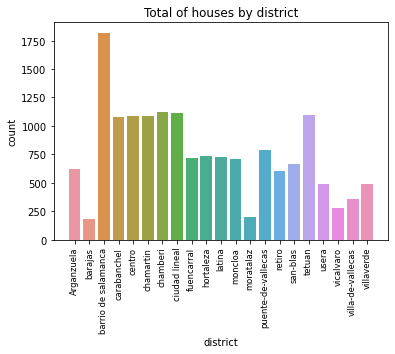

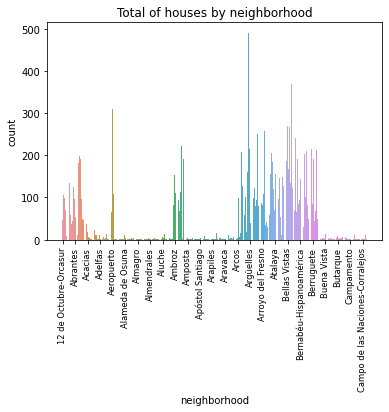

In [ ]:
## Plotting a graph as to how many houses there are in each district and neighbourhood

for col in ["district", "neighborhood"]:
    df_plot = df.copy()
    
    df_plot = (df.groupby(col)[col].count()
                                    .to_frame()
                                    .rename(columns={col: "count"})
                                    .reset_index())
    sns.barplot(x=df_plot[col], y=df_plot["count"])
    plt.title(f"Total of houses by {col}")
    plt.tick_params(axis='x', labelsize="small", labelrotation=90)
    plt.locator_params(axis='x', nbins=25)
    plt.show()

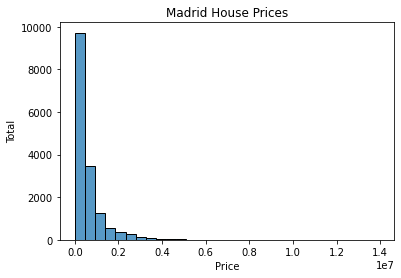

In [ ]:
## Checking the price distribution

sns.histplot(df.price, bins=30)
plt.title('Madrid House Prices')
plt.ylabel("Total")
plt.xlabel("Price")
plt.show()

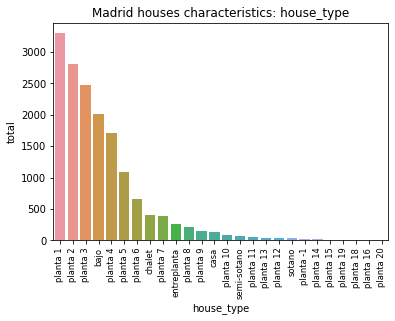

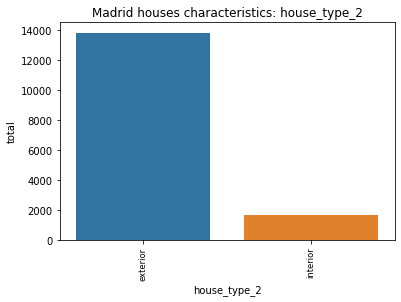

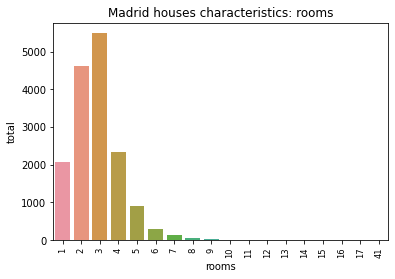

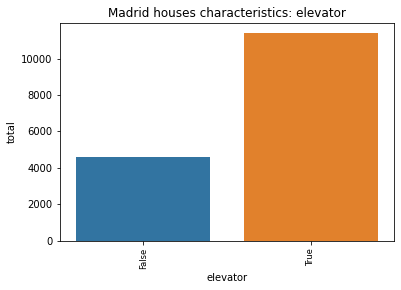

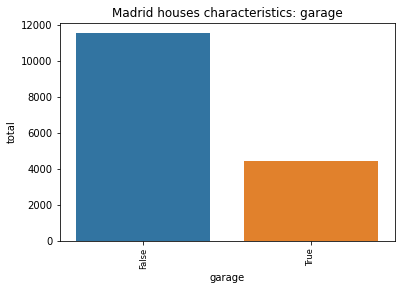

In [ ]:
## Count for every characteristic of house

for idx in ["house_type", "house_type_2", "rooms", "elevator", "garage"]:
    df_fig = df[idx].value_counts().to_frame().reset_index().rename(columns=({idx:"total","index":idx}))
    sns.barplot(x=df_fig[idx], y=df_fig["total"])
    plt.title(f'Madrid houses characteristics: {idx}')
    plt.tick_params(axis='x', labelsize="small", labelrotation=90)
    plt.show()
    print()
    print()

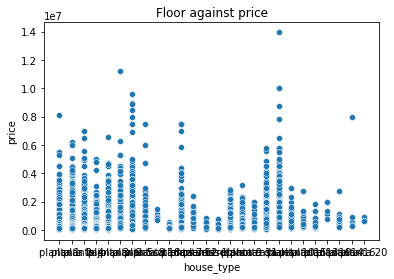

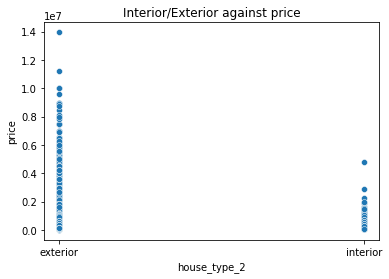

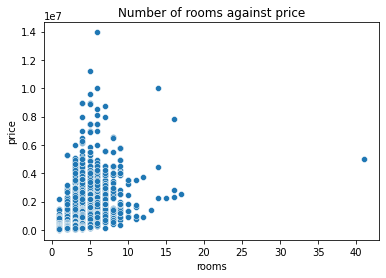

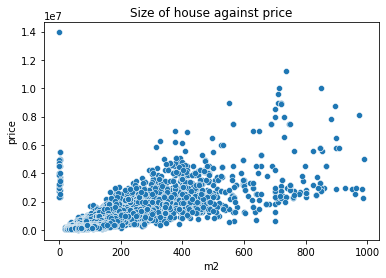

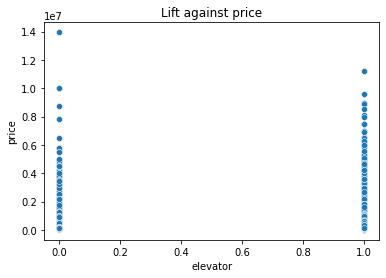

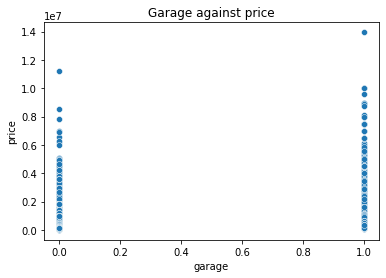

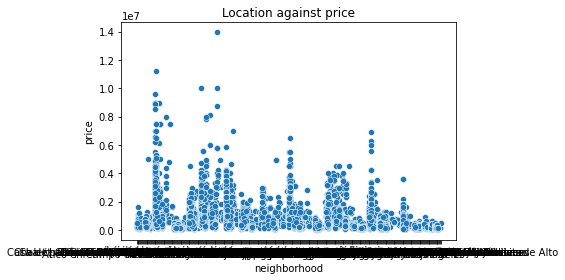

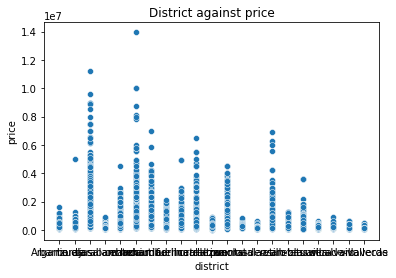

In [ ]:
numeric_cols = ['house_type', 'house_type_2', 'rooms', 'm2', 'elevator',
       'garage', 'neighborhood', 'district']
title_dict = {'house_type': 'Floor', 'house_type_2': 'Interior/Exterior', 'rooms': 'Number of rooms', 'm2': 'Size of house', 'elevator': 'Lift',
       'garage': 'Garage', 'neighborhood': 'Location', 'district': 'District'}
for col in numeric_cols:
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'{title_dict[col]} against price')
    plt.show()

In [ ]:
## This is the flat/ house that has 41 rooms and may need to be deleted in order to produce the best model 

df[df['rooms'] == 41]

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
779,4999999,bajo,exterior,41,1.76,True,True,Timón,barajas


Cleaning


In [ ]:
df[df['rooms'] == 41]

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
779,4999999,bajo,exterior,41,1.76,True,True,Timón,barajas


In [ ]:
## Dropping this row with 41 rooms that is an outlier

df.drop(779, axis=0, inplace=True)

In [ ]:
df.isnull().sum()

price             0
house_type        0
house_type_2    469
rooms             0
m2                0
elevator          0
garage            0
neighborhood      0
district          0
dtype: int64

In [ ]:
## Filling the nulls with not known
df["house_type_2"].fillna("unknown", inplace = True)

In [ ]:
df['house_type_2'].unique()

array(['exterior', 'interior', 'unknown'], dtype=object)

In [ ]:
## Changing the category columns into category instead of object

columns_object = list(df.dtypes[df.dtypes == 'object'].index)

for col in columns_object:
    df[col] = df[col].astype('category')

In [ ]:
df.describe().round()

,price,rooms,m2
count,15974.0,15974.0,15974.0
mean,623959.0,3.0,125.0
std,770154.0,1.0,102.0
min,725.0,1.0,1.0
25%,195000.0,2.0,66.0
50%,359936.0,3.0,93.0
75%,749000.0,3.0,142.0
max,13950000.0,17.0,989.0


In [ ]:
## First need to normalise categories so they are all lower case

df['neighborhood'] = df['neighborhood'].str.lower()

In [ ]:
## Need to get rid of the accents

df['neighborhood'] = df['neighborhood'].str.replace(u"á", "a")
df['neighborhood'] = df['neighborhood'].str.replace(u"ú", "u")

In [ ]:
df.neighborhood = (df.neighborhood.str.replace("chalet en ", "")
                                    .str.replace("chalet pareado en ", "")
                                    .str.replace("chalet adosado en ", "")
                                    .str.replace("duplex en ", "")
                                    .str.replace("atico en ", "")
                                    .str.replace("casa o chalet independiente en ", ""))

In [ ]:
## I can know see that there are far less unique values

df['neighborhood'].unique()

array(['chopera', 'palos de moguer', 'legazpi', 'acacias', 'delicias',
       'imperial', 'alameda de osuna', 'campo de las naciones-corralejos',
       'casco histórico de barajas', 'timón', 'aeropuerto', 'recoletos',
       'castellana', 'goya', 'fuente del berro', 'lista', 'guindalera',
       'san isidro', 'comillas', 'puerta bonita', 'vista alegre',
       'opañel', 'pau de carabanchel', 'abrantes', 'buena vista',
       'palacio', 'huertas-cortes', 'chueca-justicia',
       'malasaña-universidad', 'sol', 'lavapiés-embajadores', 'el viso',
       'bernabéu-hispanoamérica', 'nueva españa', 'ciudad jardín',
       'castilla', 'prosperidad', 'almagro', 'vallehermoso', 'arapiles',
       'gaztambide', 'nuevos ministerios-ríos rosas', 'trafalgar',
       'san pascual', 'quintana', 'colina', 'san juan bautista',
       'costillares', 'atalaya', 'concepción', 'ventas', 'pueblo nuevo',
       'fuentelarreina', 'mirasierra', 'peñagrande', 'arroyo del fresno',
       'la paz', 'las tablas',

In [ ]:
## Still so many and not more useful than district so going to delete 

df.drop(columns=['neighborhood'], inplace = True)

In [ ]:
df.head()

,price,house_type,house_type_2,rooms,m2,elevator,garage,district
0,495000,planta 1,exterior,3,118.0,True,True,Arganzuela
1,485000,planta 2,exterior,2,82.0,True,True,Arganzuela
2,315000,planta 2,exterior,2,72.0,False,False,Arganzuela
3,585000,planta 4,exterior,2,174.0,True,True,Arganzuela
4,255000,bajo,exterior,3,75.0,False,False,Arganzuela


In [ ]:
## Looking at the m2 of the house its not picking it up beacuse its 1000th off. Need to multiply by 1000?
## Looking at the neighborhood as well need to change format so it doesnt say 'casa/chalet en ....'

df.sort_values(by='m2').head()

,price,house_type,house_type_2,rooms,m2,elevator,garage,district
10660,3200000,casa,exterior,6,1.000,False,True,moncloa
10497,3200000,chalet,exterior,6,1.000,False,True,moncloa
8444,4900000,casa,exterior,9,1.000,False,True,fuencarral
8780,2750000,chalet,exterior,7,1.000,False,True,fuencarral
9557,4500000,chalet,exterior,9,1.016,False,True,hortaleza


In [ ]:
## Some of the bigger houses need to be multiplied by 1000 

df.m2[df['m2'] < 10] = df.m2[df['m2'] < 10] * 1000

<ipython-input-37-2c82af3f7809>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.m2[df['m2'] < 10] = df.m2[df['m2'] < 10] * 1000


In [ ]:
df.sort_values(by="m2").head()

,price,house_type,house_type_2,rooms,m2,elevator,garage,district
11487,86000,planta 2,exterior,1,20.0,False,False,puente-de-vallecas
14097,69900,bajo,exterior,1,20.0,False,False,tetuan
3858,99000,planta 3,interior,1,20.0,True,False,centro
4449,185000,planta 3,unknown,1,20.0,False,False,centro
4354,75000,bajo,interior,1,20.0,False,False,centro


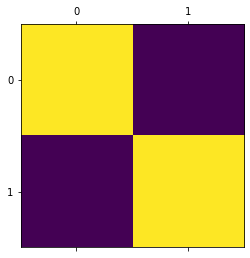

In [ ]:
## Exploring correlations

corr_mat = df[["price", "m2"]].corr()

# plot it
plt.matshow(corr_mat)
plt.show()

In [ ]:
## Creating a copy after all the cleaning

copydf = df.copy()

Moving on to modeling 

In [ ]:
## Picking some feature columns

feat_cols = ['rooms', 'elevator', 'garage', 'm2', 'house_type_2']

In [ ]:
df.head()

,price,house_type,house_type_2,rooms,m2,elevator,garage,district
0,495000,planta 1,exterior,3,118.0,True,True,Arganzuela
1,485000,planta 2,exterior,2,82.0,True,True,Arganzuela
2,315000,planta 2,exterior,2,72.0,False,False,Arganzuela
3,585000,planta 4,exterior,2,174.0,True,True,Arganzuela
4,255000,bajo,exterior,3,75.0,False,False,Arganzuela


In [ ]:
## Setting X and y

X = df[feat_cols]
y = df['price']

In [ ]:
## Train/ test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3195 entries, 8297 to 221
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   rooms         3195 non-null   int64   
 1   elevator      3195 non-null   bool    
 2   garage        3195 non-null   bool    
 3   m2            3195 non-null   float64 
 4   house_type_2  3195 non-null   category
dtypes: bool(2), category(1), float64(1), int64(1)
memory usage: 84.4 KB


In [ ]:
df.columns

Index(['price', 'house_type', 'house_type_2', 'rooms', 'm2', 'elevator',
       'garage', 'district'],
      dtype='object')

In [ ]:
X_train.columns

Index(['rooms', 'elevator', 'garage', 'm2', 'house_type_2'], dtype='object')

In [ ]:
X_train.head()

,rooms,elevator,garage,m2,house_type_2
558,1,True,False,65.0,exterior
12799,3,True,False,90.0,exterior
1328,2,True,False,110.0,exterior
12983,3,True,True,146.0,exterior
2457,2,True,False,169.0,exterior


In [ ]:
## Applying get dummies to the features that are categories and applying to X_train, wait do i need to be dropping forst 

X_train = pd.get_dummies(X_train, columns = ['garage'], drop_first = True, prefix = 'garage') 
X_train = pd.get_dummies(X_train, columns = ['elevator'], drop_first = True, prefix = 'elevator') 
X_train = pd.get_dummies(X_train, columns = ['house_type_2'], drop_first = True, prefix = 'exterior/interior') 

In [ ]:
X_train.head()

,rooms,m2,garage_True,elevator_True,exterior/interior_interior,exterior/interior_unknown
558,1,65.0,0,1,0,0
12799,3,90.0,0,1,0,0
1328,2,110.0,0,1,0,0
12983,3,146.0,1,1,0,0
2457,2,169.0,0,1,0,0


In [ ]:
## Linear Regression model results

feat_cols = ['rooms', 'm2', 'garage_True', 'elevator_True',
       'exterior/interior_interior', 'exterior/interior_unknown']

X_train = sm.add_constant(X_train)

lin_reg = sm.OLS(y_train, X_train[feat_cols])
results = lin_reg.fit()
results.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              7873.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):                        0.00
Time:                        10:22:16   Log-Likelihood:                     -1.8472e+05
No. Observations:               12779   AIC:                                  3.695e+05
Df Residuals:                   12773   BIC:                                  3.695e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
rooms                      -4.959e+04   3121.160    -15.888      0.000   -5.57e+04   -4.35e+04
m2                          5435.5735     47.752    113.829      0.000    5341.972    5529.175
garage_True                -6.849e+04   9838.143     -6.962      0.000   -8.78e+04   -4.92e+04
elevator_True               1.698e+05   8069.623     21.039      0.000    1.54e+05    1.86e+05
exterior/interior_interior -3.639e+04   1.33e+04     -2.739      0.006   -6.24e+04   -1.03e+04
exterior/interior_unknown  -1.006e+05   2.38e+04     -4.227      0.000   -1.47e+05   -5.39e+04
==============================================================================
Omnibus:                     8437.474   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2731508.408
Skew:                           2.008   Prob(JB):                         0.00
Kurtosis:                      74.511   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## this shows us how far off we can be not good 

X_train['y_pred'] = results.predict(X_train[feat_cols])

rmse = statsmodels.tools.eval_measures.rmse(y_train, X_train['y_pred'])

print(rmse)

458733.73426477535


In [ ]:
error_df = X_train.sort_values(by=['y_pred'], ascending=False)

In [ ]:
error_df['y_train'] = y_train

In [ ]:
error_df.head()

,const,rooms,m2,garage_True,elevator_True,exterior/interior_interior,exterior/interior_unknown,y_pred,y_train
10682,1.0,11,2400.0,0,0,0,0,1.249991e+07,3500000
10389,1.0,10,2400.0,1,0,0,0,1.248101e+07,3500000
10496,1.0,6,2314.0,1,0,0,0,1.221190e+07,4500000
10860,1.0,9,1500.0,1,0,0,0,7.638582e+06,4000000
8850,1.0,5,1350.0,1,0,0,0,7.021597e+06,5500000


In [ ]:
error_df['diff'] = error_df['y_pred'] - error_df['y_train']


In [ ]:
error_df.head()

,const,rooms,m2,garage_True,elevator_True,exterior/interior_interior,exterior/interior_unknown,y_pred,y_train,diff
10682,1.0,11,2400.0,0,0,0,0,1.249991e+07,3500000,8.999911e+06
10389,1.0,10,2400.0,1,0,0,0,1.248101e+07,3500000,8.981010e+06
10496,1.0,6,2314.0,1,0,0,0,1.221190e+07,4500000,7.711902e+06
10860,1.0,9,1500.0,1,0,0,0,7.638582e+06,4000000,3.638582e+06
8850,1.0,5,1350.0,1,0,0,0,7.021597e+06,5500000,1.521597e+06


In [ ]:
df.iloc[558]

price               375000
house_type        planta 1
house_type_2      exterior
rooms                    1
m2                    65.0
elevator              True
garage               False
district        Arganzuela
Name: 558, dtype: object

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
## thought that maybe looking at what were important features was a good idea 

cols = ['rooms', 'm2', 'garage_True', 'district_barajas',
       'district_barrio de salamanca', 'district_carabanchel',
       'district_centro', 'district_chamartin', 'district_chamberi',
       'district_ciudad lineal', 'district_fuencarral', 'district_hortaleza',
       'district_latina', 'district_moncloa', 'district_moratalaz',
       'district_puente-de-vallecas', 'district_retiro', 'district_san-blas',
       'district_tetuan', 'district_usera', 'district_vicalvaro',
       'district_villa-de-vallecas', 'district_villaverde', 'window_interior',
       'window_unknown']
    
cols.append('y_pred')

#pd.Series([variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])], index = X_train[cols].columns)


In [ ]:
## we are using this one as its all in one
from statsmodels.stats.outliers_influence import variance_inflation_factor


## function to calcualte teh VIF  of a data fr,ae 
def checkVIF(X):
    vif = pd.DataFrame()   ## initialising an empty data frame
    vif['Features'] = cols  ## the features are the ones in training,  the feature cols are above 
    # calculating vif of each feature
    vif['VIF'] = [variance_inflation_factor(X[cols].values, i) for i in range(X[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2) ## rounding to 2 decimal places

    vif = vif.sort_values(by = "VIF", ascending = False)   ## sort from highest to lowest

    return(vif)

In [ ]:
X_train.columns

Index(['const', 'rooms', 'm2', 'garage_True', 'elevator_True',
       'exterior/interior_interior', 'exterior/interior_unknown', 'y_pred'],
      dtype='object')

Trying with another Linear Regression Model using just m2 and rooms

In [ ]:
X_train.head()

,const,rooms,m2,garage_True,elevator_True,exterior/interior_interior,exterior/interior_unknown,y_pred
558,1.0,1,65.0,0,1,0,0,473502.436759
12799,1.0,3,90.0,0,1,0,0,510216.267175
1328,1.0,2,110.0,0,1,0,0,668515.490182
12983,1.0,3,146.0,1,1,0,0,746119.530322
2457,1.0,2,169.0,0,1,0,0,989214.325709


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12779, 8), (12779,), (3195, 5), (3195,))

In [ ]:
X

,rooms,elevator,garage,m2,house_type_2
0,3,True,True,118.0,exterior
1,2,True,True,82.0,exterior
2,2,False,False,72.0,exterior
3,2,True,True,174.0,exterior
4,3,False,False,75.0,exterior
...,...,...,...,...,...
15970,4,False,False,106.0,exterior
15971,3,False,False,60.0,exterior
15972,2,False,False,65.0,exterior
15973,2,False,False,71.0,exterior


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              7873.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):                        0.00
Time:                        10:23:43   Log-Likelihood:                     -1.8472e+05
No. Observations:               12779   AIC:                                  3.695e+05
Df Residuals:                   12773   BIC:                                  3.695e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
rooms                      -4.959e+04   3121.160    -15.888      0.000   -5.57e+04   -4.35e+04
m2                          5435.5735     47.752    113.829      0.000    5341.972    5529.175
garage_True                -6.849e+04   9838.143     -6.962      0.000   -8.78e+04   -4.92e+04
elevator_True               1.698e+05   8069.623     21.039      0.000    1.54e+05    1.86e+05
exterior/interior_interior -3.639e+04   1.33e+04     -2.739      0.006   -6.24e+04   -1.03e+04
exterior/interior_unknown  -1.006e+05   2.38e+04     -4.227      0.000   -1.47e+05   -5.39e+04
==============================================================================
Omnibus:                     8437.474   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2731508.408
Skew:                           2.008   Prob(JB):                         0.00
Kurtosis:                      74.511   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_train.head()

,const,rooms,m2,garage_True,elevator_True,exterior/interior_interior,exterior/interior_unknown,y_pred
558,1.0,1,65.0,0,1,0,0,473502.436759
12799,1.0,3,90.0,0,1,0,0,510216.267175
1328,1.0,2,110.0,0,1,0,0,668515.490182
12983,1.0,3,146.0,1,1,0,0,746119.530322
2457,1.0,2,169.0,0,1,0,0,989214.325709


In [ ]:
y_train.head

<bound method NDFrame.head of 558       375000
12799     199000
1328      639000
12983     408000
2457      795000
          ...   
13419     395000
5391     3995000
861      2150000
15796     132000
7271      169000
Name: price, Length: 12779, dtype: int64>

In [ ]:
X_train.head()

,const,rooms,m2,garage_True,elevator_True,exterior/interior_interior,exterior/interior_unknown,y_pred
558,1.0,1,65.0,0,1,0,0,473502.436759
12799,1.0,3,90.0,0,1,0,0,510216.267175
1328,1.0,2,110.0,0,1,0,0,668515.490182
12983,1.0,3,146.0,1,1,0,0,746119.530322
2457,1.0,2,169.0,0,1,0,0,989214.325709


In [ ]:
feat_cols = ['rooms', 'm2']

X= X_train[feat_cols]

lin_reg = sm.OLS(y_train, X)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.779
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                          2.257e+04
Date:                Wed, 21 Dec 2022   Prob (F-statistic):                        0.00
Time:                        10:23:44   Log-Likelihood:                     -1.8495e+05
No. Observations:               12779   AIC:                                  3.699e+05
Df Residuals:                   12777   BIC:                                  3.699e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rooms       -1.54e+04   2576.442     -5.975      0.000   -2.04e+04   -1.03e+04
m2          5295.2663     46.561    113.727      0.000    5203.999    5386.534
==============================================================================
Omnibus:                     7658.016   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2355498.020
Skew:                           1.689   Prob(JB):                         0.00
Kurtosis:                      69.426   Cond. No.                         108.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
rooms_m2_predict = results.predict(X)

In [ ]:
rooms_m2_predict

558      3.287971e+05
12799    4.303883e+05
1328     5.516889e+05
12983    7.269232e+05
2457     8.641096e+05
             ...     
13419    5.786558e+05
5391     2.433961e+06
861      1.665167e+06
15796    3.557640e+05
7271     3.134019e+05
Length: 12779, dtype: float64

In [ ]:
y_train

558       375000
12799     199000
1328      639000
12983     408000
2457      795000
          ...   
13419     395000
5391     3995000
861      2150000
15796     132000
7271      169000
Name: price, Length: 12779, dtype: int64

In [ ]:
model_results_df = pd.DataFrame(data= y_train, columns = ['y_train'])

In [ ]:
model_results_df

,y_train


In [ ]:
model_results_df = pd.DataFrame()

model_results_df['y_train'] = y_train
model_results_df['rooms_m2_predict'] = rooms_m2_predict
model_results_df['difference'] = model_results_df['rooms_m2_predict'] - model_results_df['y_train'] 

In [ ]:
X_train.head()

,const,rooms,m2,garage_True,elevator_True,exterior/interior_interior,exterior/interior_unknown,y_pred
558,1.0,1,65.0,0,1,0,0,473502.436759
12799,1.0,3,90.0,0,1,0,0,510216.267175
1328,1.0,2,110.0,0,1,0,0,668515.490182
12983,1.0,3,146.0,1,1,0,0,746119.530322
2457,1.0,2,169.0,0,1,0,0,989214.325709


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

feat_cols = ['rooms', 'm2']

X= X_train[feat_cols]
scaler.fit(X)
X_scaled = scaler.transform(X)

lin_reg = sm.OLS(y_train, X_scaled)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.779
Model:                            OLS   Adj. R-squared (uncentered):              0.778
Method:                 Least Squares   F-statistic:                          2.246e+04
Date:                Wed, 21 Dec 2022   Prob (F-statistic):                        0.00
Time:                        10:23:44   Log-Likelihood:                     -1.8498e+05
No. Observations:               12779   AIC:                                  3.700e+05
Df Residuals:                   12777   BIC:                                  3.700e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.433e+05   5.35e+04      6.414      0.000    2.38e+05    4.48e+05
x2          1.248e+07   1.13e+05    110.133      0.000    1.23e+07    1.27e+07
==============================================================================
Omnibus:                     6776.925   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2354964.075
Skew:                           1.302   Prob(JB):                         0.00
Kurtosis:                      69.453   Cond. No.                         4.53
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_results_df = pd.DataFrame()
rooms_m2_predict_scaled = results.predict(X_scaled)

model_results_df['y_train'] = y_train
model_results_df['rooms_m2_predict_scaled'] = rooms_m2_predict_scaled
model_results_df['difference'] = model_results_df['rooms_m2_predict_scaled'] - model_results_df['y_train'] 

In [ ]:
model_results_df.head()

,y_train,rooms_m2_predict_scaled,difference
558,375000,236021.282398,-138978.717602
12799,199000,410054.938749,211054.938749
1328,639000,493497.925638,-145502.074362
12983,408000,703770.312399,295770.312399
2457,795000,802948.051449,7948.051449


In [ ]:
model_results_df.describe()

,y_train,rooms_m2_predict_scaled,difference
count,1.277900e+04,1.277900e+04,1.277900e+04
mean,6.242896e+05,6.040219e+05,-2.026762e+04
std,7.739297e+05,6.363082e+05,4.675095e+05
min,7.250000e+02,0.000000e+00,-8.094294e+06
25%,1.950000e+05,2.682043e+05,-1.014279e+05
50%,3.590000e+05,4.200691e+05,3.708846e+04
75%,7.500000e+05,6.937562e+05,1.473786e+05
max,1.395000e+07,1.269746e+07,9.197457e+06


Adjusting the model 

In [ ]:
X_train.head()

,const,rooms,m2,garage_True,elevator_True,exterior/interior_interior,exterior/interior_unknown,y_pred
558,1.0,1,65.0,0,1,0,0,473502.436759
12799,1.0,3,90.0,0,1,0,0,510216.267175
1328,1.0,2,110.0,0,1,0,0,668515.490182
12983,1.0,3,146.0,1,1,0,0,746119.530322
2457,1.0,2,169.0,0,1,0,0,989214.325709


In [ ]:
X_train_copy = X_train.copy()

X_train.drop(columns=['y_pred'], inplace = True)

In [ ]:
feature_cols = ['rooms', 'm2', 'elevator_True', 'garage_True', 'exterior/interior_interior', 'exterior/interior_unknown']

X_again= X_train[feature_cols]
scaler.fit(X_again)
X_scaled_again = scaler.transform(X_again)

lin_reg = sm.OLS(y_train, X_scaled_again)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.790
Model:                            OLS   Adj. R-squared (uncentered):              0.790
Method:                 Least Squares   F-statistic:                              8017.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):                        0.00
Time:                        10:23:44   Log-Likelihood:                     -1.8463e+05
No. Observations:               12779   AIC:                                  3.693e+05
Df Residuals:                   12773   BIC:                                  3.693e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -3.53e+05   5.91e+04     -5.976      0.000   -4.69e+05   -2.37e+05
x2          1.264e+07   1.14e+05    110.463      0.000    1.24e+07    1.29e+07
x3          1.877e+05   7273.483     25.809      0.000    1.73e+05    2.02e+05
x4         -6.685e+04   9760.347     -6.849      0.000    -8.6e+04   -4.77e+04
x5         -1.392e+04   1.32e+04     -1.057      0.291   -3.97e+04    1.19e+04
x6         -8.259e+04   2.35e+04     -3.510      0.000   -1.29e+05   -3.65e+04
==============================================================================
Omnibus:                     8547.987   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2735011.457
Skew:                           2.059   Prob(JB):                         0.00
Kurtosis:                      74.551   Cond. No.                         28.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_results_df2 = pd.DataFrame()
more_predict_scaled = results.predict(X_scaled_again)

model_results_df2['y_train'] = y_train
model_results_df2['more_predict_scaled'] = more_predict_scaled
model_results_df2['difference'] = model_results_df2['more_predict_scaled'] - model_results_df2['y_train'] 

model_results_df2.head()

,y_train,more_predict_scaled,difference
558,375000,426699.359973,51699.359973
12799,199000,515344.942422,316344.942422
1328,639000,643616.395106,4616.395106
12983,408000,745890.507121,337890.507121
2457,795000,956941.330202,161941.330202


In [ ]:
rmse = statsmodels.tools.eval_measures.rmse(y_train, more_predict_scaled)
print(rmse)

455449.32068760705


In [ ]:
X_test

,rooms,elevator,garage,m2,house_type_2
8297,3,True,False,74.0,exterior
2614,5,True,False,140.0,exterior
9622,2,False,False,64.0,exterior
3822,2,False,False,37.0,interior
4878,4,True,False,235.0,exterior
...,...,...,...,...,...
1183,6,True,True,168.0,exterior
7442,4,True,False,335.0,exterior
15509,3,True,True,90.0,exterior
11630,2,False,False,76.0,exterior


Testing the model on the test data

In [ ]:
X_test = pd.get_dummies(X_test, columns = ['garage'], drop_first = True, prefix = 'garage') 
X_test = pd.get_dummies(X_test, columns = ['elevator'], drop_first = True, prefix = 'elevator') 
X_test = pd.get_dummies(X_test, columns = ['house_type_2'], drop_first = True, prefix = 'exterior/interior') 

feature_cols = ['rooms', 'm2', 'elevator_True', 'garage_True', 'exterior/interior_interior', 'exterior/interior_unknown']

X_real= X_test[feature_cols]
scaler.fit(X_real)
X_real_thing = scaler.transform(X_real)

lin_reg = sm.OLS(y_test, X_real_thing)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.792
Model:                            OLS   Adj. R-squared (uncentered):              0.791
Method:                 Least Squares   F-statistic:                              2021.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):                        0.00
Time:                        10:25:28   Log-Likelihood:                         -46098.
No. Observations:                3195   AIC:                                  9.221e+04
Df Residuals:                    3189   BIC:                                  9.224e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -4.002e+05   1.11e+05     -3.614      0.000   -6.17e+05   -1.83e+05
x2          7.027e+06   1.28e+05     54.936      0.000    6.78e+06    7.28e+06
x3          1.983e+05    1.4e+04     14.139      0.000    1.71e+05    2.26e+05
x4         -9.992e+04   1.93e+04     -5.181      0.000   -1.38e+05   -6.21e+04
x5         -1.976e+04   2.47e+04     -0.802      0.423   -6.81e+04    2.86e+04
x6         -7.732e+04   4.81e+04     -1.608      0.108   -1.72e+05    1.69e+04
==============================================================================
Omnibus:                     2089.349   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           165317.525
Skew:                           2.321   Prob(JB):                         0.00
Kurtosis:                      37.933   Cond. No.                         18.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
final_results = pd.DataFrame()
predictions_scaled = results.predict(X_real_thing)

final_results['y_test'] = y_test
final_results['predictions_scaled'] = predictions_scaled
final_results['difference'] = final_results['predictions_scaled'] - final_results['y_test'] 

final_results.head()

,y_test,predictions_scaled,difference
8297,220000,4.302406e+05,210240.590045
2614,990000,7.255710e+05,-264428.985264
9622,153000,2.057796e+05,52779.591434
3822,144000,4.337304e+04,-100626.962696
4878,1485000,1.254146e+06,-230854.150037


In [ ]:
rmse = statsmodels.tools.eval_measures.rmse(y_test, predictions_scaled)
print(rmse)

446492.07007802173


In [ ]:
final_results.describe()

,y_test,predictions_scaled,difference
count,3.195000e+03,3.195000e+03,3.195000e+03
mean,6.226357e+05,6.383957e+05,1.575994e+04
std,7.549796e+05,5.921965e+05,4.462837e+05
min,4.750000e+04,-7.731641e+04,-5.233462e+06
25%,1.990000e+05,3.167252e+05,-5.086512e+04
50%,3.600000e+05,4.993771e+05,6.442676e+04
75%,7.304500e+05,7.366619e+05,1.814593e+05
max,8.950000e+06,6.819922e+06,4.152947e+06


Random forest

In [ ]:
copydf.head()

,price,house_type,house_type_2,rooms,m2,elevator,garage,district
0,495000,planta 1,exterior,3,118.0,True,True,Arganzuela
1,485000,planta 2,exterior,2,82.0,True,True,Arganzuela
2,315000,planta 2,exterior,2,72.0,False,False,Arganzuela
3,585000,planta 4,exterior,2,174.0,True,True,Arganzuela
4,255000,bajo,exterior,3,75.0,False,False,Arganzuela


In [ ]:
## some useful functions

def apr(y_pred, y_real):
    accuracy = metrics.accuracy_score(y_real, y_pred)
    precision = metrics.precision_score(y_real, y_pred)
    recall = metrics.recall_score(y_real, y_pred)
    f1 = metrics.f1_score(y_real, y_pred)
    
    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")
    return accuracy, precision, recall, f1


##

def produce_confusion(positive_label, negative_label, cut_off, df, y_pred_name, y_real_name):
    
    #Set pred to 0 or 1 depending on whether it's higher than the cut_off point.
    
    if cut_off != 'binary':      
        df['pred_binary'] = np.where(df[y_pred_name] > cut_off , 1, 0)
    else: 
        df['pred_binary'] = df[y_pred_name]
    
    #Build the CM
    cm = confusion_matrix(df[y_real_name], df['pred_binary'])  
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g'); 

    # labels, title, ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('Real labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels([negative_label, positive_label])
    ax.yaxis.set_ticklabels([negative_label, positive_label]);

    print('Test accuracy = ', accuracy_score(df[y_real_name], df['pred_binary']))

    return accuracy_score(df[y_real_name], df['pred_binary'])

In [ ]:
## Bagging with 50 trees

rf = RandomForestClassifier(n_estimators=50)
et = ExtraTreesClassifier(n_estimators=50)

In [ ]:
feature_columns = ['m2', 'rooms']

X = copydf[feature_columns]
y = copydf['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
## using cross validation 5

rf_score = cross_val_score(rf, X_train, y_train, cv=5)
et_score = cross_val_score(et, X_train, y_train, cv=5)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
##

print(f'Random scored {rf_score}')
print(f'Extra Random scored {et_score}')

Random scored [0.09076682 0.07824726 0.08020344 0.08802817 0.08649706]
Extra Random scored [0.08568075 0.0786385  0.07942097 0.08333333 0.08649706]


In [ ]:
##

rf_params = {
    'n_estimators': [20, 40, 60],
    'max_depth': [None, 1, 2, 3, 4, 5],
}


gs = GridSearchCV(rf, param_grid=rf_params, cv=2)

gs.fit(X_train, y_train)

print(gs.best_score_)

gs.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


0.06854984273390469


{'max_depth': None, 'n_estimators': 60}

In [ ]:
## finding a gs score this is bad bad 

gs.score(X_train, y_train)

0.20831050942953283

In [ ]:
copydf = RandomForestClassifier(max_depth=1, n_estimators=40)
copydf.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, n_estimators=40)

In [ ]:
clf = RandomForestClassifier(max_depth=1, n_estimators=40)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, n_estimators=40)

In [ ]:
y_pred = clf.predict(X_train)

In [ ]:
### Returns confusion matrix for the logistic regression and other metrics

def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(confusion_matrix(predicted, actual), "\n")
    print(f"The accuracy of your model is: {accuracy(predicted,actual)}')")
    print(f"The recall of your model is: {recall(predicted,actual)}')")
    print(f"The precision of your model is: {precision(predicted,actual)}')")
    print(f"The F1 score of your model is: {f1(predicted,actual)}')")

In [ ]:
## trying to predict bad results

#get_results(y_train, X_train['y_pred'])
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))


Accuracy: 0.01494639643164567


Trying with KNN


In [ ]:
from sklearn import datasets 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
import numpy as np

In [ ]:
## Start setting features as X and price as target for y

X_train.head()

,m2,rooms
558,65.0,1
12799,90.0,3
1328,110.0,2
12983,146.0,3
2457,169.0,2


In [ ]:
## there is different scale in sepal length and petal width so we scale
## always sacke with knn

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # save to empty objet
scaler.fit(X_train) ## fitting it onto th eterain set

X_train = scaler.transform(X_train) ## and then transform
X_test = scaler.transform(X_test) ##

In [ ]:
np.min(X_train)

0.0

In [ ]:
np.max(X_train)

1.0

In [ ]:
errors = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i) ## setting k value
    knn.fit(X_train, y_train) ## fitting on to train
    pred_y = knn.predict(X_test) ## we should first predict on x train then test
    errors.append(np.mean(pred_y != y_test)) ## append the mean error for k=i t

In [ ]:
pred_y != y_test

8297     True
2614     True
9622     True
3822     True
4878     True
         ... 
1183     True
7442     True
15509    True
11630    True
221      True
Name: price, Length: 3195, dtype: bool

In [ ]:
## Saving every prediction

errors = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i) ##set kn
    knn.fit(X_train, y_train) ## fit kn
    locals()['pred_y_{}'.format(i)] = knn.predict(X_test) ## predict on this
    errors.append(np.mean(locals()['pred_y_{}'.format(i)] != y_test))

In [ ]:
from scipy.spatial.distance import hamming

In [ ]:
## average sum of how many times things were different 

hamming(y_test, pred_y_1)

0.9436619718309859

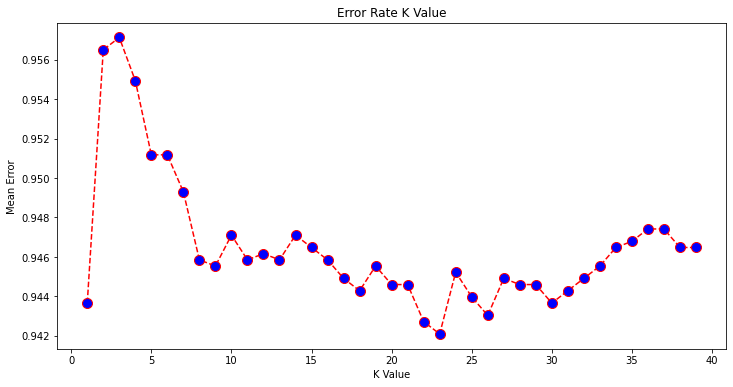

In [ ]:
## plot the errors as a scatter plot
## we want it where mean eroor is 0 or low so we would choose between 4-25

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40)
         , errors
         , color='RED'
         , linestyle='dashed'
         , marker='o'
         , markerfacecolor='blue'
         , markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [ ]:
## picking 26 as k, based on residuals graph

classifier = KNeighborsClassifier(n_neighbors=26)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=26)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
## confusion matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

       47500       0.00      0.00      0.00         1
       55100       0.00      0.00      0.00         1
       62600       0.00      0.00      0.00         1
       66000       0.00      0.00      0.00         1
       69000       0.00      0.00      0.00         3
       69697       0.00      0.00      0.00         1
       70000       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         4
       76000       0.00      0.00      0.00         1
       76990       0.00      0.00      0.00         1
       77500       0.00      0.00      0.00         1
       77900       0.00      0.00      0.00         1
       78000       0.00      0.00      0.00         1
       79000       0.00      0.00      0.00         1
       81000       0.00      0.00      0.00         0
       83000   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1